In [46]:
from proj_1_module import *
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import math
from scipy.integrate import solve_ivp
plt.style.use([ 'notebook'])

$$\mu = \frac{m_s * m_e}{m_s + m_e}$$
$$\frac{dH}{dp} = \frac{p}{\mu}$$
$$\frac{dH}{dq} = \frac{G(m_s+m_e)\mu}{r^3} r$$
Since sun's mass is about 330000 times larger than earth, we can reduce this problem where we assume earth is massless and will not affect the final trajetory calculation of the earth.
$$\frac{dH}{dp} = v_e$$
$$\frac{dH}{dq} = \frac{G m_s}{|r^3|} q$$

## 2D case

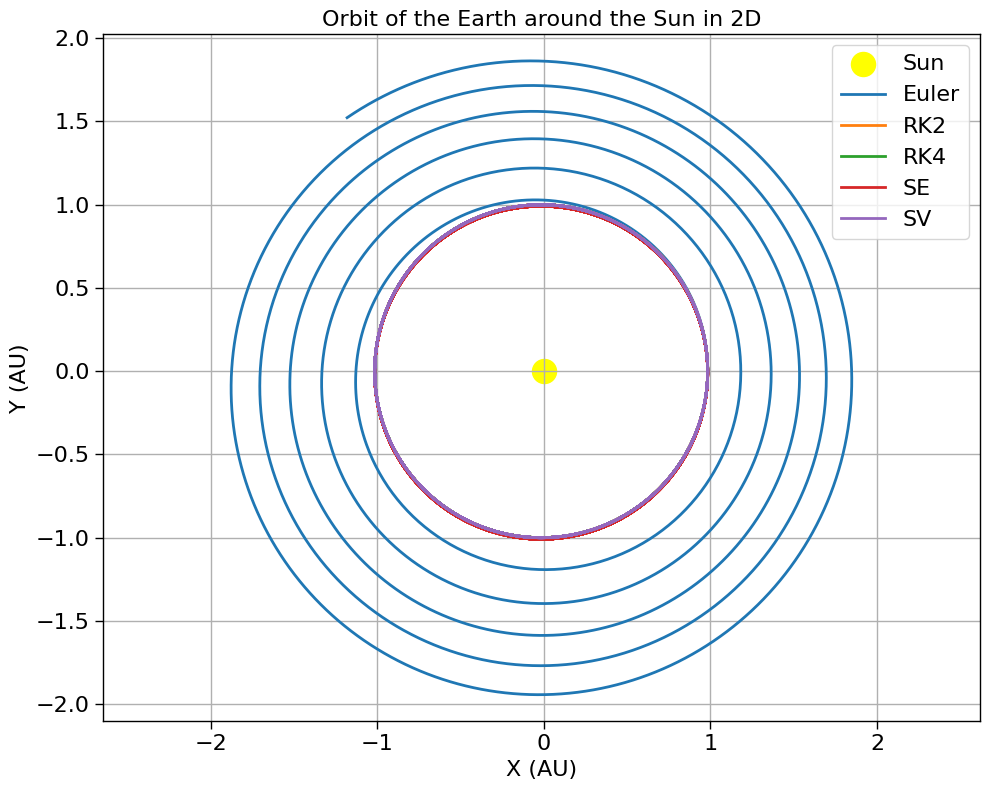

In [47]:
def dH_p(q, p):
    return p

def dH_q(q, p):
    G = 2.959159 * 10**(-4)  # in units of AU^3/(solar mass * earth days)
    M = 1    # in unit of Solar Mass
    r = np.linalg.norm(q)
    return G * M / r**3 * q

# Constants
t_0 = 0.0
q_0 = np.array([0.9833, 0])
p_0 = np.array([0, 0.01749])
h = 1 # 1 earth day per step
N = 3650  # total steps for 10 years
methods = ["Euler", "RK2", "RK4", "SE", "SV"]

plt.figure(figsize=(10, 8))
plt.scatter([0], [0], s=300, color='yellow', label='Sun')  # Sun's position

for method in methods:
    T, Q, P = hamiltonian_solve(dH_q, dH_p, d=2, t_0=t_0, q_0=q_0, p_0=p_0, h=h, N=N, method=method)
    plt.plot(Q[:, 0], Q[:, 1], label=f"{method}")

plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.title('Orbit of the Earth around the Sun in 2D')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

As we can see, Euler is pretty bad. Therefore, we will exclude Euler method.

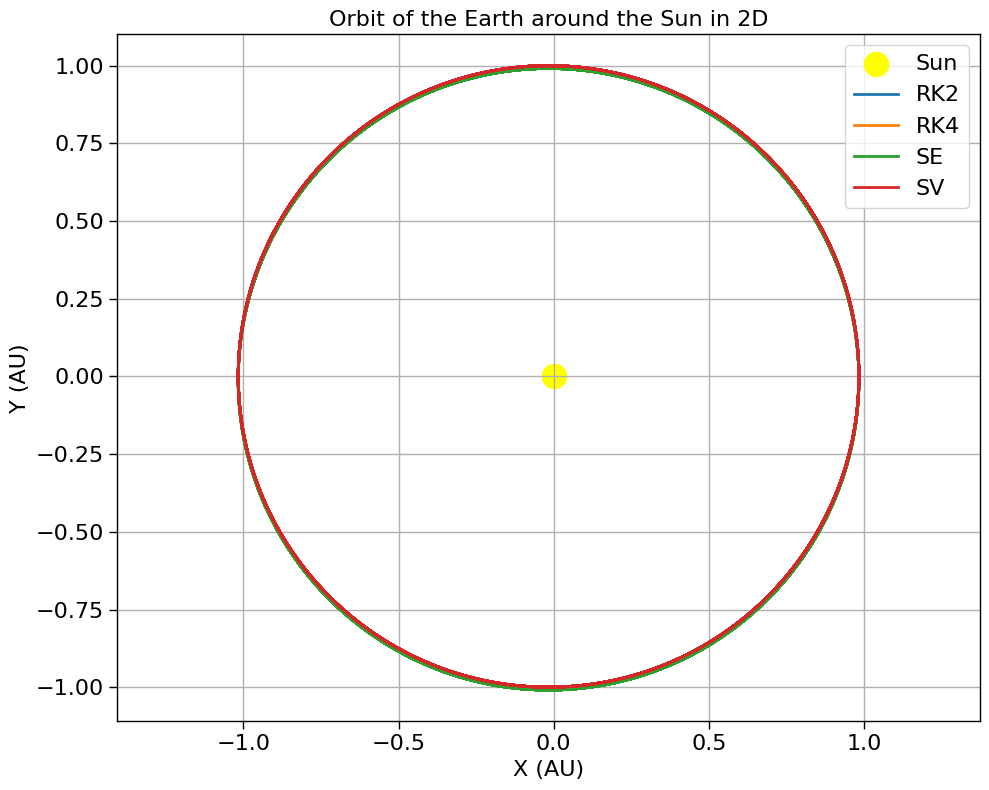

In [48]:
def dH_p(q, p):
    return p

def dH_q(q, p):
    G = 2.959159 * 10**(-4)  # in units of AU^3/(solar mass * earth days)
    M = 1    # in unit of Solar Mass
    r = np.linalg.norm(q)
    return G * M / r**3 * q

# Constants
t_0 = 0.0
q_0 = np.array([0.9833, 0])
p_0 = np.array([0, 0.01749])
h = 1 # 1 earth day per step
N = 3650  # total steps for 10 years
methods = ["RK2", "RK4", "SE", "SV"]

plt.figure(figsize=(10, 8))
plt.scatter([0], [0], s=300, color='yellow', label='Sun')  # Sun's position

for method in methods:
    T, Q, P = hamiltonian_solve(dH_q, dH_p, d=2, t_0=t_0, q_0=q_0, p_0=p_0, h=h, N=N, method=method)
    plt.plot(Q[:, 0], Q[:, 1], label=f"{method}")

plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.title('Orbit of the Earth around the Sun in 2D')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Kepler third law

$$
\frac{a^3}{T^2} = \frac{GM}{4\pi**2}
$$

In [49]:
kepler = 1**3/365**2
G = 2.959159*10**(-4)
M=1
kepler_from_G = G*M/(4*np.pi**2)
print(kepler, kepler_from_G)

7.5060987051979735e-06 7.4956373116469165e-06


# 3D simulation of our function against scipy solver

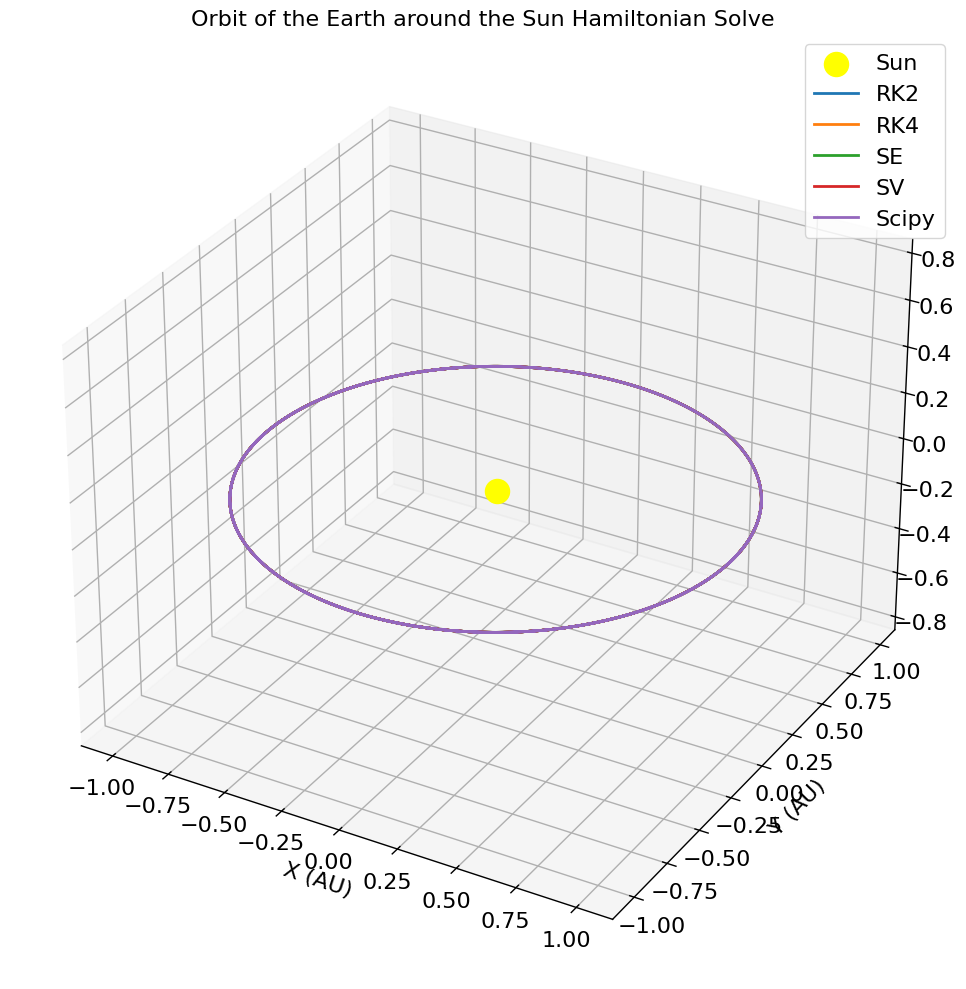

In [50]:
def gravitational_system(t, y, G, M):
    x, y, z, vx, vy, vz = y
    r = np.sqrt(x**2 + y**2 + z**2)
    
    ax = -G * M * x / r**3
    ay = -G * M * y / r**3
    az = -G * M * z / r**3
    
    return [vx, vy, vz, ax, ay, az]

def solve_orbit(x0, v0, G, M, T, dt):
    initial_conditions = x0 + v0
    
    t_eval = np.arange(0, T, dt)
    
    sol = solve_ivp(gravitational_system, [0, T], initial_conditions, args=(G, M), t_eval=t_eval, rtol=1e-9, atol=1e-9)
    
    return t_eval, sol.y

G = 2.959159*10**(-4) 
M = 1   
x0 = [-5.34743068e-01 , 8.26293951e-01, -3.61541763e-05] 
v0 = [-1.47187017e-02 ,-9.41540742e-03 ,-8.67603060e-08]
T = 1000  
dt = 1  
t, solution_scipy = solve_orbit(x0, v0, G, M, T, dt)

# plotting everything together in 3D
plt.figure(figsize=(14, 10))

positions = []
velocitys = []
methods = ["RK2", "RK4", "SE", "SV"]

ax = plt.axes(projection='3d')
ax.scatter([0], [0], [0], s=300,color='yellow', label='Sun') 
T_store = 0
for method in methods:
    T, Q, P = hamiltonian_solve(dH_q, dH_p, d=3, t_0=t_0, q_0=x0, p_0=v0, h=h, N=N, method="SV")
    positions.append(Q)
    velocitys.append(P)
    T_store = T
    ax.plot(solution_scipy[0, :], solution_scipy[1, :], solution_scipy[2,:],label=f"{method}")

ax.plot(solution_scipy[0, :], solution_scipy[1, :], solution_scipy[2,:],label='Scipy')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.title('Orbit of the Earth around the Sun Hamiltonian Solve')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


## conservation of angular momentum

Initial angular momentum:  5.163338612507471e-08


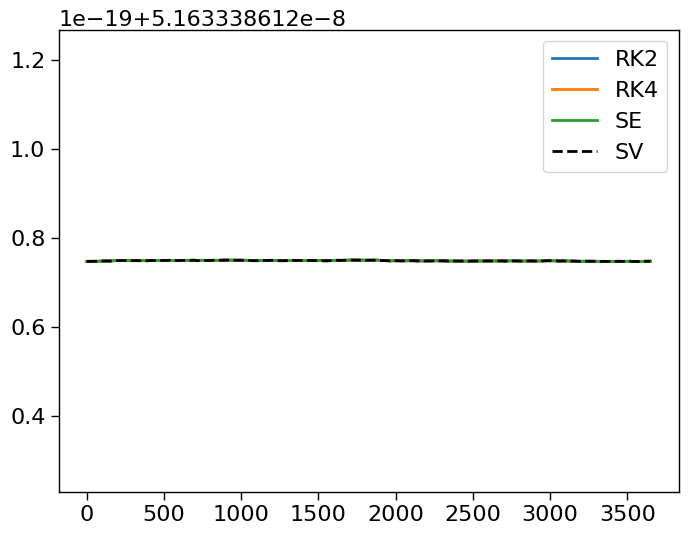

In [51]:
x0 = np.array([-5.34743068e-01 , 8.26293951e-01, -3.61541763e-05])
v0 = np.array([-1.47187017e-02 ,-9.41540742e-03 ,-8.67603060e-08])
G = 2.959159*10**(-4) 
M = 1 # sun mass in solar mass
m_e = 3.0025*10**-6 # earth mass in solar mass

L = np.linalg.norm(np.cross(x0, v0*m_e))
print('Initial angular momentum: ', L)

for i in range(len(positions)):
    method_position = positions[i]
    method_velocitys = velocitys[i]
    if methods[i] == 'SV':
        plt.plot(T_store, np.linalg.norm(np.cross(method_position, method_velocitys*m_e), axis=1), 'k--',label =f"{methods[i]}")
    else:
        plt.plot(T_store, np.linalg.norm(np.cross(method_position, method_velocitys*m_e), axis=1),label =f"{methods[i]}")
plt.legend()
plt.show()

## simulate for 10000 cycles, plotting 2d due to speed

I think the SV and RK4 algorithm should be among the most accurate ones. The SV method conserve the sympletic nature of the problem, whereas RK4 goes into higher order for most accuracy. For long cycles like 10000, the SV algorithm should come out on top.

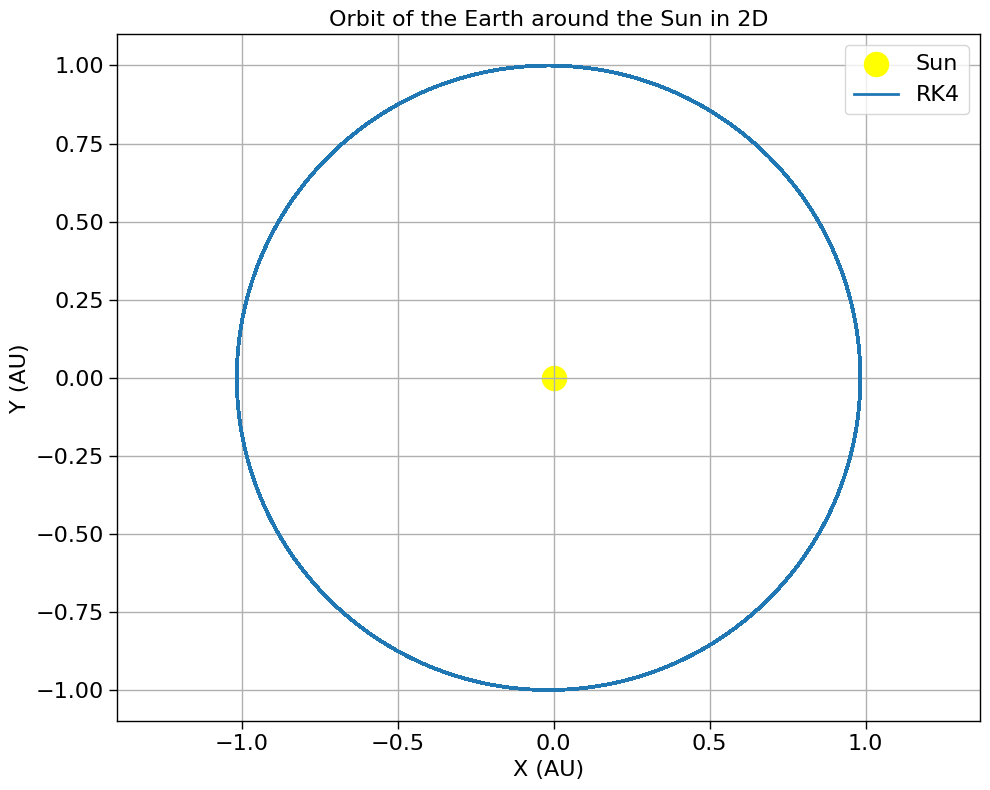

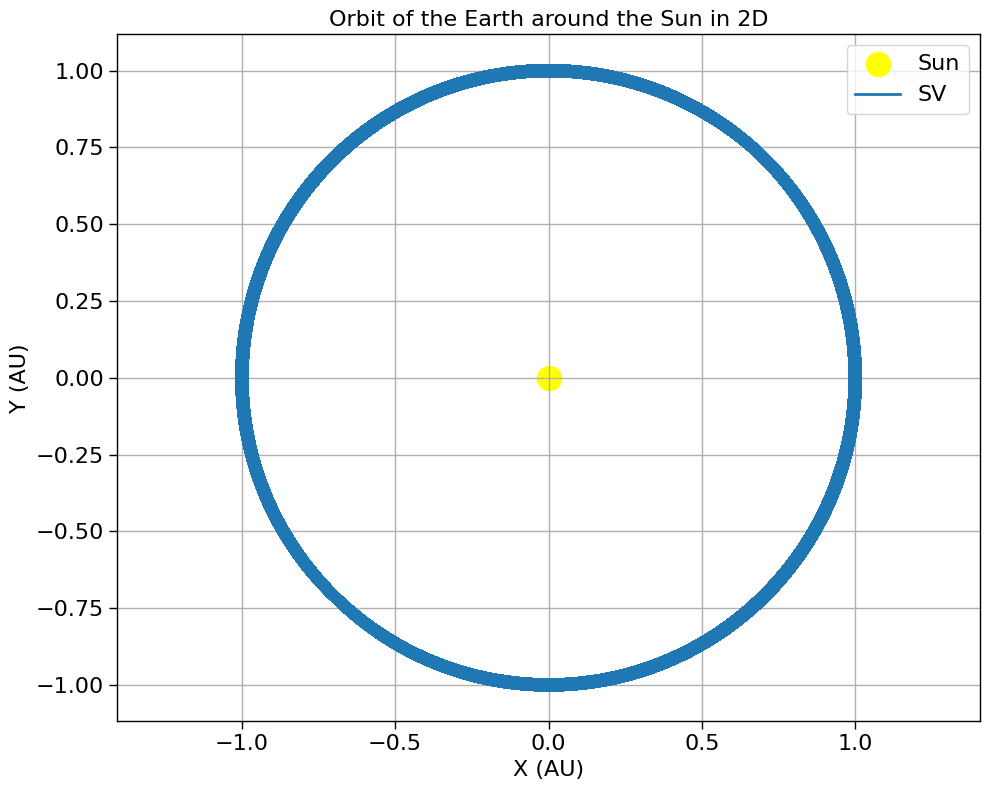

In [52]:
def dH_p(q, p):
    return p

def dH_q(q, p):
    G = 2.959159 * 10**(-4)  # in units of AU^3/(solar mass * earth days)
    M = 1    # in unit of Solar Mass
    r = np.linalg.norm(q)
    return G * M / r**3 * q

# Constants
t_0 = 0.0
q_0 = np.array([0.9833, 0])
p_0 = np.array([0, 0.01749])
h = 1 # 1 earth day per step
N = 365*10000  # total steps for 10 years
methods = ["RK4", "SV"]



T_out = []
Q_out = []
P_out = []

for method in methods:
    T, Q, P = hamiltonian_solve(dH_q, dH_p, d=2, t_0=t_0, q_0=q_0, p_0=p_0, h=h, N=N, method=method)
    T_out.append(T)
    Q_out.append(Q)
    P_out.append(P)

plt.figure(figsize=(10, 8))
plt.scatter([0], [0], s=300, color='yellow', label='Sun')  # Sun's position
plt.plot(Q_out[0][:, 0], Q_out[0][:, 1], label=f"{methods[0]}")
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.title('Orbit of the Earth around the Sun in 2D')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter([0], [0], s=300, color='yellow', label='Sun')  # Sun's position
plt.plot(Q_out[1][:, 0], Q_out[1][:, 1], label=f"{methods[1]}")
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.title('Orbit of the Earth around the Sun in 2D')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

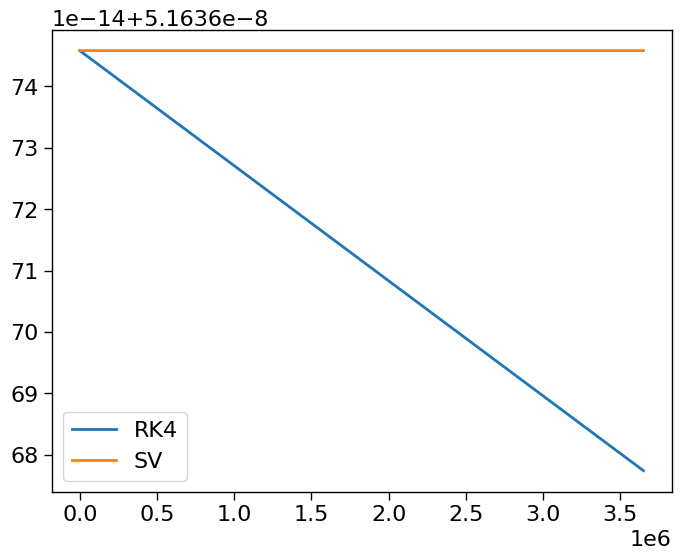

In [67]:
def expand_array(n_by_2_array):
    zeros_column = np.zeros((n_by_2_array.shape[0], 1))
    return np.hstack((n_by_2_array, zeros_column))

for i in range(len(Q_out)):
    method_position = expand_array(Q_out[i])
    method_velocitys = expand_array(P_out[i])
    x = np.linalg.norm(np.cross(method_position, method_velocitys*m_e), axis=1)
    plt.plot(T_out[0], np.linalg.norm(np.cross(method_position, method_velocitys*m_e), axis=1),  label=f"{methods[i]}")
plt.legend()
plt.show()

Comparing the two methods for 10000 cycles, I am comparing the trajectories and angular momentum. Suprising, the RK4 seems to perform better when looking at the trajectory diagrams. This is probably due to the fract that RK4's high accuracy per step, so it performs better in terms of trajectory motion.However, looking at the angular momentum, the SV methods perserve conserve quantity better. The difference in efficiency in different aspects make sense and are correct to our assumption.

## Data
Wekipedia for earth mass, G and sun mass. Nasa for earth to sun distance, and convert to 2D and 3D cases. Convert mass to solar mass, time to earth day, and distance to AU. <br>
https://en.wikipedia.org/wiki/Earth_mass#:~:text=The%20current%20best%20estimate%20for,six%20ronnagrams%2C%20or%206.0%20Rg. <br>
https://en.wikipedia.org/wiki/Solar_mass <br>
https://www.unitconverters.net/length/astronomical-unit-to-meter.htm <br>
https://www.nasa.gov/wp-content/uploads/2015/01/yoss_act1.pdf <br>